In [1]:
import os
import datetime

import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='paper', style='darkgrid', font_scale=1.2)

In [2]:
DATA_DIR = 'data'
FILE_NAME = 'initial_timeseries_SEIRD.csv' 
FILE_PATH = os.path.join(os.pardir, DATA_DIR, FILE_NAME)

df = pd.read_csv(FILE_PATH)
df.tail()

,testing_date,total_tests,confirmed_positives,confirmed_deceased,estimate_recovered
93,2020-05-28,456,1.0,0.0,2051.0
94,2020-05-29,561,0.0,0.0,2059.0
95,2020-05-30,258,0.0,0.0,2063.0
96,2020-05-31,245,0.0,0.0,2072.0
97,2020-06-01,471,0.0,0.0,2077.0


In [3]:
cum_positives = np.cumsum(df.confirmed_positives.values)
cum_deceased = np.cumsum(df.confirmed_deceased.values)

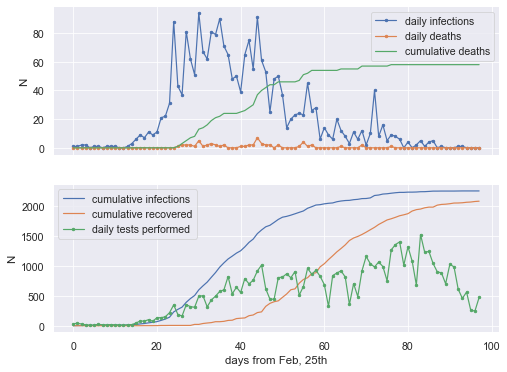

In [4]:
fig = plt.figure(figsize=(8, 6))
axs = fig.subplots(nrows=2, ncols=1, sharex=True)
axs[0].plot(df.confirmed_positives.values, '.-', label='daily infections')
axs[0].plot(df.confirmed_deceased.values, '.-', label='daily deaths')
axs[0].plot(cum_deceased, label='cumulative deaths')
axs[1].set_xlabel('days from Feb, 25th')
axs[0].set_ylabel('N')
axs[0].legend()

axs[1].plot(cum_positives, label='cumulative infections')
axs[1].plot(df.estimate_recovered, label='cumulative recovered')
axs[1].plot(df.total_tests.values, '.-', label='daily tests performed')
axs[1].set_xlabel('days from Feb, 25th')
axs[1].set_ylabel('N')
axs[1].legend()

plt.show();